In [1]:
import cosmology
import scipy.special as spfun
import galsim
import astropy.io.fits as pyfits
import haloSim as halSim
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def compareGS():
    halo=halSim.nfw_lensWB00(mass=1e15,conc=0.1,redshift=0.3,ra=0.,dec=0.)
    kappa=halo.lensKernel(2.)*halo.Sigma(2000.,1000.)
    shear=halo.lensKernel(2.)*halo.DeltaSigmaComplex(2000.,1000.)
    pos_cl  =   galsim.PositionD(0.,0.)
    haloGS  =   galsim.nfw_halo.NFWHalo(mass= 1e15,
                conc=0.1, redshift= 0.3,
                halo_pos=pos_cl ,omega_m= 0.3,
                omega_lam= 0.7)
    kappaGS=haloGS.getConvergence(pos=(2000.,1000.),z_s=np.ones(1)*2.,units = "arcsec")
    shearGS=haloGS.getShear(pos=(2000.,1000.),z_s=np.ones(1)*2.,units = "arcsec",reduced=False)
    print('r_s')
    print(halo.rs_arcsec,haloGS.rs_arcsec)
    print('kappa:')
    print(kappa,kappaGS)
    print('shear:')
    print(shear,shearGS)
    return
compareGS()

r_s
4719.459416589283 4710.696878758708
kappa:
0.036485039806916204 0.036356340016520626
shear:
(-0.011631837537199093-0.015509116716265458j) (-0.011603613555610784, -0.01547148474081438)


# WB00 vs. TJ03
Galsim uses WB00 NFW lensing mdoel

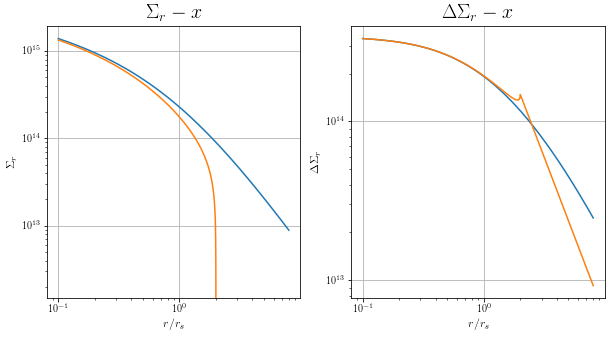

In [3]:
def compareTJWB():
    halo1=halSim.nfw_lensWB00(mass=1e15,conc=2.,redshift=0.3,ra=0.,dec=0.)
    halo2=halSim.nfw_lensTJ03(mass=1e15,conc=2.,redshift=0.3,ra=0.,dec=0.)
    x=np.linspace(0.1,8.,3000)
    y=np.zeros(3000)
    DeltaSigma1=halo1.DeltaSigma(x*halo1.rs_arcsec,y*halo1.rs_arcsec)
    Sigma1=halo1.Sigma(x*halo1.rs_arcsec,y*halo1.rs_arcsec)
    DeltaSigma2=halo2.DeltaSigma(x*halo2.rs_arcsec,y*halo2.rs_arcsec)
    Sigma2=halo2.Sigma(x*halo2.rs_arcsec,y*halo2.rs_arcsec)
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(1,2,1)
    ax.loglog(x,Sigma1)
    ax.loglog(x,Sigma2)
    ax.grid()
    ax.set_title(r'$ \Sigma_r - x$',fontsize=20)
    ax.set_xlabel(r'$r/r_s$',fontsize=12)
    ax.set_ylabel(r'$ \Sigma_r$',fontsize=12)

    ax=fig.add_subplot(1,2,2)
    ax.loglog(x,DeltaSigma1)
    ax.loglog(x,DeltaSigma2)
    ax.grid()
    ax.set_title(r'$\Delta \Sigma_r - x$',fontsize=20)
    ax.set_xlabel(r'$r/r_s$',fontsize=12)
    ax.set_ylabel(r'$\Delta \Sigma_r$',fontsize=12)
    return
compareTJWB()

In [3]:
def testMass():
    halo2=halSim.nfw_lensTJ03(mass=7e+14,conc=2.,redshift=0.3,ra=0.,dec=0.)
    x=np.linspace(0.01,5.,5000)
    y=np.zeros(5000)
    Sigma2=halo2.Sigma(x*halo2.rs_arcsec,y*halo2.rs_arcsec)
    print(2*np.pi*np.sum(Sigma2*x)*halo2.rs**2.*(x[1]-x[0]))
    return
testMass()

704325673728285.0


# Basis in Different Frames

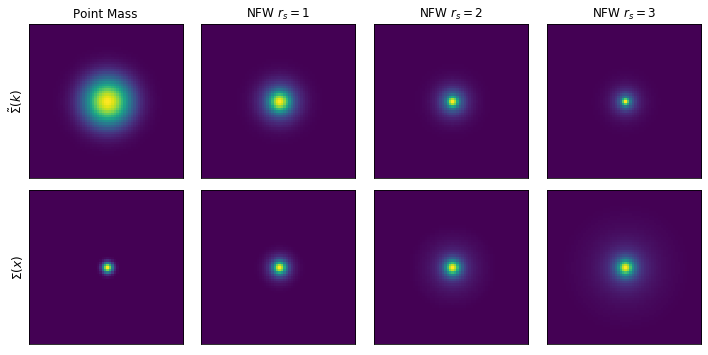

In [8]:
def plotAtom():
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(2,4,1)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(r'$\tilde{\Sigma}(k)$',fontsize=12)
    ax.set_title('Point Mass',fontsize=12)
    atomF=np.fft.fftshift(halSim.GausAtom(sigma=1.5,ngrid=64,fou=True))
    ax.imshow(atomF)
    
    ax=fig.add_subplot(2,4,2)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_title(r'NFW $r_s=1$',fontsize=12)
    atomF=np.fft.fftshift(halSim.haloCS02SigmaAtom(r_s=1.,ngrid=64,c=9.,smooth_scale=1.5))
    ax.imshow(atomF)

    ax=fig.add_subplot(2,4,3)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_title(r'NFW $r_s=2$',fontsize=12)
    atomF=np.fft.fftshift(halSim.haloCS02SigmaAtom(r_s=2.,ngrid=64,c=9.,smooth_scale=1.5))
    ax.imshow(atomF)
    
    ax=fig.add_subplot(2,4,4)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_title(r'NFW $r_s=3$',fontsize=12)
    atomF=np.fft.fftshift(halSim.haloCS02SigmaAtom(r_s=3.,ngrid=64,c=9.,smooth_scale=1.5))
    ax.imshow(atomF)
    
    
    ax=fig.add_subplot(2,4,5)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(r'$\Sigma(x)$',fontsize=12)
    atomF=np.fft.fftshift(halSim.GausAtom(sigma=1.5,ngrid=64,fou=False))
    ax.imshow(atomF)
    
    ax=fig.add_subplot(2,4,6)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    atomF=np.fft.fftshift(halSim.haloCS02SigmaAtom(r_s=1.,ngrid=64,c=9.,smooth_scale=1.5,fou=False))
    ax.imshow(atomF)

    ax=fig.add_subplot(2,4,7)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    atomF=np.fft.fftshift(halSim.haloCS02SigmaAtom(r_s=2.,ngrid=64,c=9.,smooth_scale=1.5,fou=False))
    ax.imshow(atomF)
    
    ax=fig.add_subplot(2,4,8)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    atomF=np.fft.fftshift(halSim.haloCS02SigmaAtom(r_s=3.,ngrid=64,c=9.,smooth_scale=1.5,fou=False))
    ax.imshow(atomF)
    plt.tight_layout()
    return
plotAtom()

In [3]:
import halolet
halolet.nfwlet2D(pltDir='plot',smooth_scale=-1)

In [4]:
import halo_wavelet as starlet
starlet.starlet2D(pltDir='plot')